In [29]:
import numpy as np
import keras as K
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense,Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import *

# IMPORTING IMAGES FOR TRAIN AND TEST SET

In [30]:
train_path = 'images/train'
valid_path = 'images/valid'
test_path = 'images/test'

In [31]:
train_batches = ImageDataGenerator().flow_from_directory(train_path,target_size = (224,224),classes = ['dog','cat'],batch_size = 10)
test_batches = ImageDataGenerator().flow_from_directory(test_path,target_size = (224,224),classes = ['dog','cat'],batch_size = 6)
valid_batches = ImageDataGenerator().flow_from_directory(valid_path,target_size = (224,224),classes = ['dog','cat'],batch_size = 5)

Found 37 images belonging to 2 classes.
Found 6 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [32]:
def plots(ims,figsize = (12,6),rows = 1,interp = False , titles = None):
    if(type(ims[0]) is np.ndarray):
        ims = np.array(ims).astype(np.uint8)
        if(ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize = figsize)
    cols = len(ims) //rows if len(ims)%2==0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows,cols,i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i],fontsize = 16)
        plt.imshow(ims[i],interpolation = None if interp else 'none')

In [24]:
imgs , labels = next(train_batches)

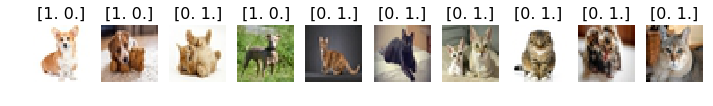

In [25]:
plots(imgs,titles = labels)

# BUILD AND TRAIN MODEL

In [33]:
model = Sequential([Conv2D(32,(3,3),activation = 'relu',input_shape = (224,224,3)),
                   Flatten(),
                   Dense(2,activation = 'softmax')])

In [34]:
model.compile(Adam(lr = 0.0001),loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [36]:
model.fit_generator(train_batches,steps_per_epoch = 4,validation_data = valid_batches,validation_steps = 5,epochs = 10,verbose = 2)

Epoch 1/10
 - 2s - loss: 8.6092 - acc: 0.4659 - val_loss: 7.7367 - val_acc: 0.5200
Epoch 2/10
 - 1s - loss: 8.3329 - acc: 0.4830 - val_loss: 8.3814 - val_acc: 0.4800
Epoch 3/10
 - 2s - loss: 7.7802 - acc: 0.5173 - val_loss: 7.7367 - val_acc: 0.5200
Epoch 4/10
 - 2s - loss: 8.1947 - acc: 0.4916 - val_loss: 8.3814 - val_acc: 0.4800
Epoch 5/10
 - 2s - loss: 8.0566 - acc: 0.5002 - val_loss: 8.3814 - val_acc: 0.4800
Epoch 6/10
 - 1s - loss: 8.3329 - acc: 0.4830 - val_loss: 7.7367 - val_acc: 0.5200
Epoch 7/10
 - 2s - loss: 8.4710 - acc: 0.4744 - val_loss: 8.3814 - val_acc: 0.4800
Epoch 8/10
 - 2s - loss: 8.1947 - acc: 0.4916 - val_loss: 8.3814 - val_acc: 0.4800
Epoch 9/10
 - 1s - loss: 8.1947 - acc: 0.4916 - val_loss: 8.3814 - val_acc: 0.4800
Epoch 10/10
 - 1s - loss: 8.3329 - acc: 0.4830 - val_loss: 7.7367 - val_acc: 0.5200


Here we see that accuracy is only 50% because or model contains only 1 convolutional layer. Therefore accuracy can be increased by adding more convolution layer and max pooling layers.Now we will add more Convolution layers in next stage to get more accuracy.